In [1]:
%run 'ks25_Read_epistasis.ipynb'
notebook_prefix = 'ks26'
image_counter = Counter()

/Users/karen/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/karen/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)



Reading precalculated epistasis...
/Users/karen/HIS3InterspeciesEpistasis/Analysis/Karen/files_dump/epistasis_in_foursomes/



Variables: 

- ep_dict: a dictionary, Keys are tuples (mutA, mutB) and values are pandas.Series of epistasis between mutA and mutB in all backgrounds. 
Tuples (mutA, mutB) are sorted by aa_position.

- get_ep_summary: function that takes ep_dict as an argument and applies an arbitrary function to every pd.Series object. For example, ep_summary = get_ep_summary(ep_dict, np.mean)

Important: natlib_filtering is currently True. This can be changed in the cell #2.



In [29]:
def get_fraction_strong(ep_series, strong_epistasis_threshold=0.4):
    strong = ep_series[np.abs(ep_series) > strong_epistasis_threshold]
    return 1. * len(strong) / len(ep_series)

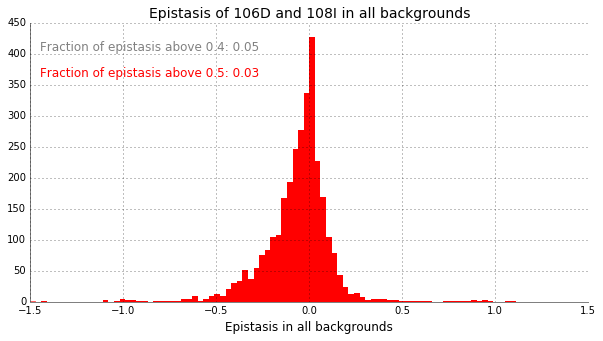

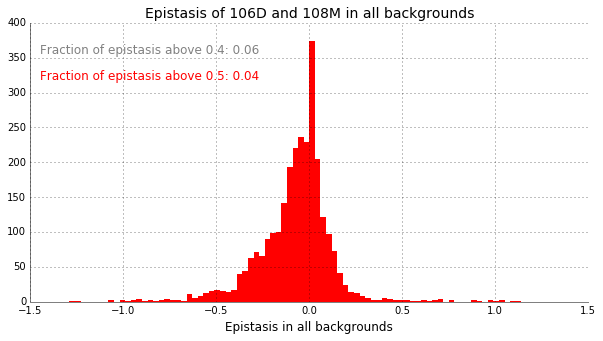

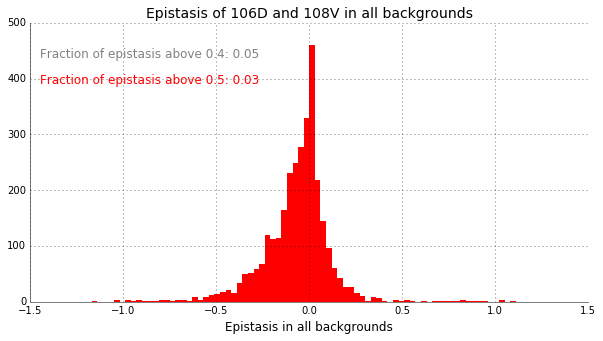

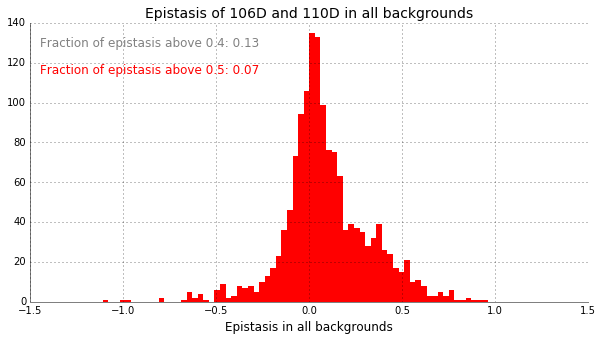

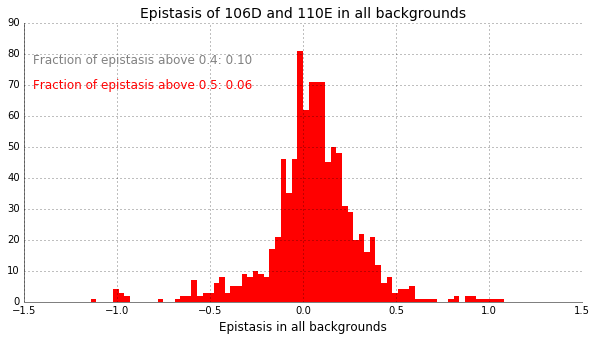

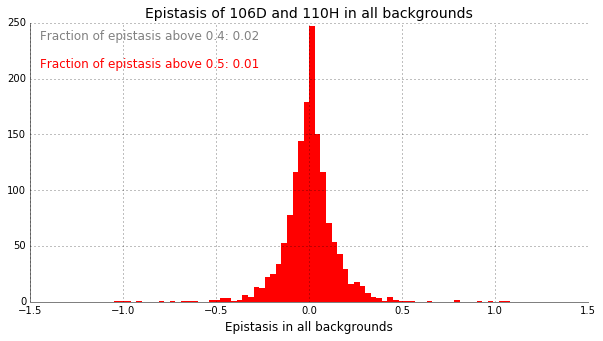

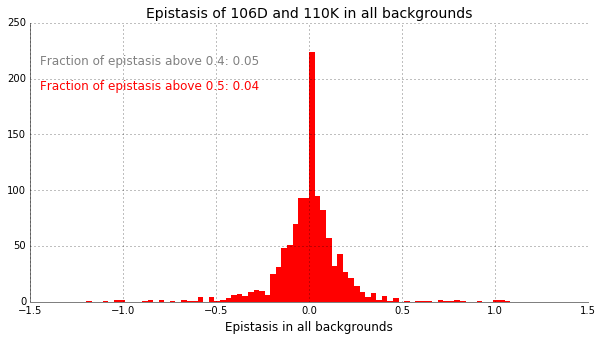

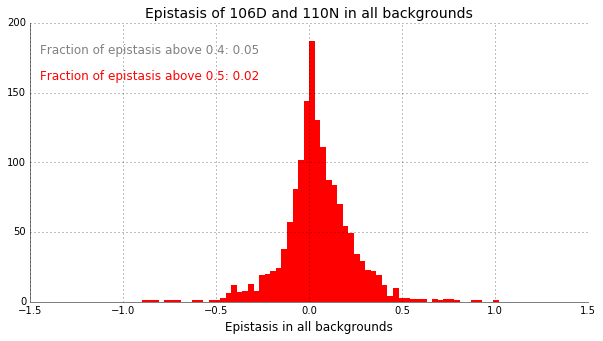

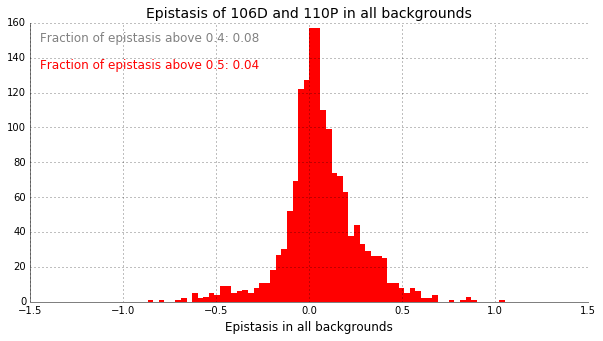

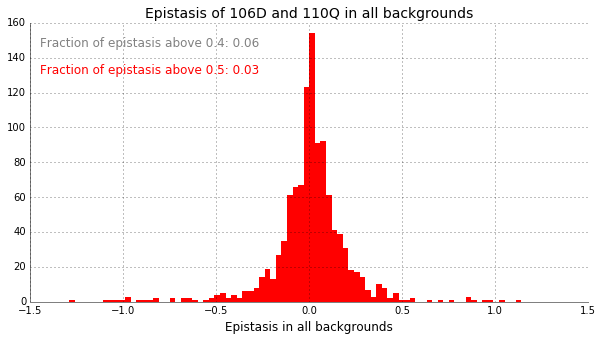

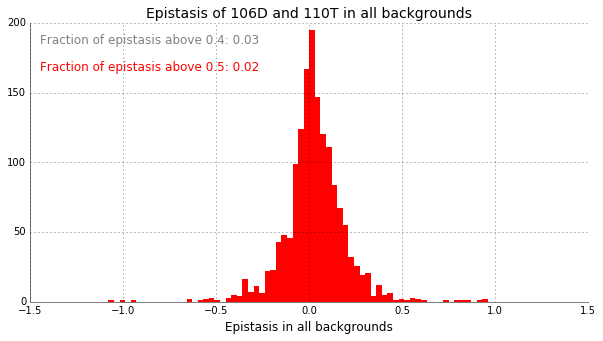

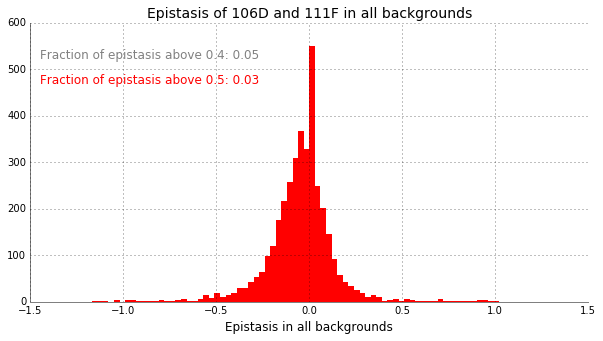

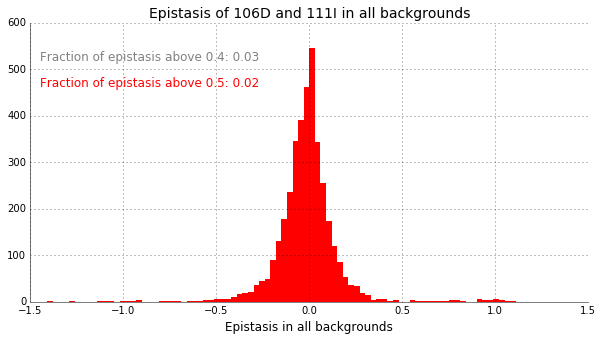

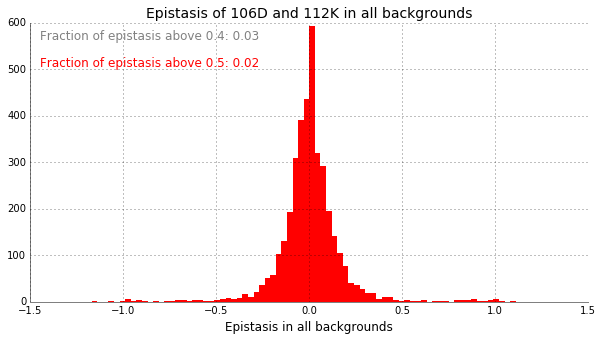

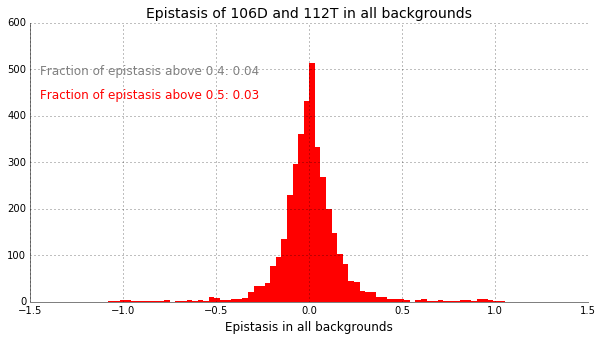

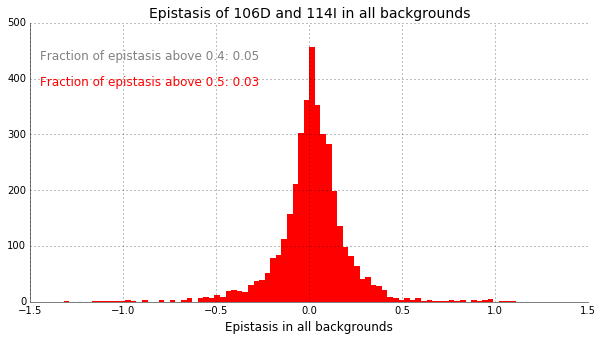

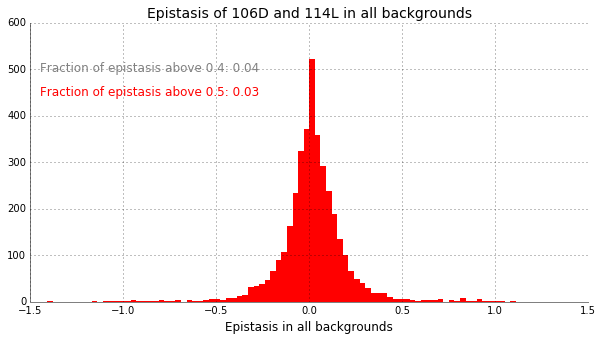

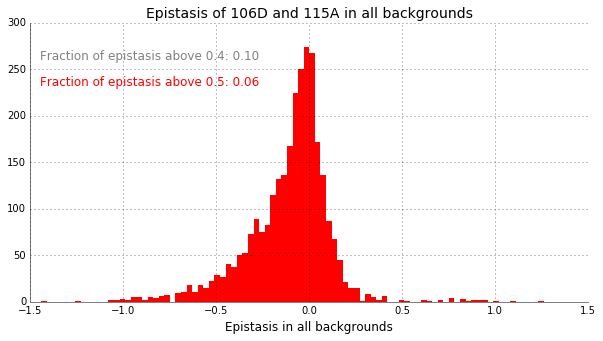

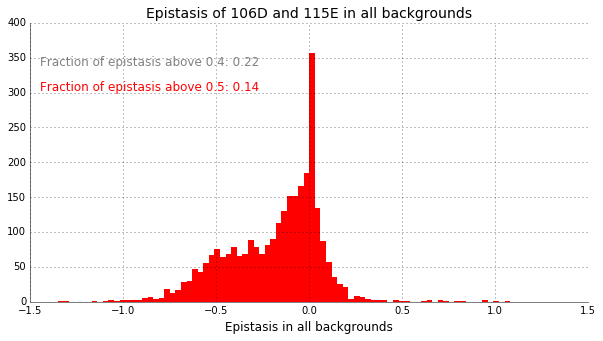

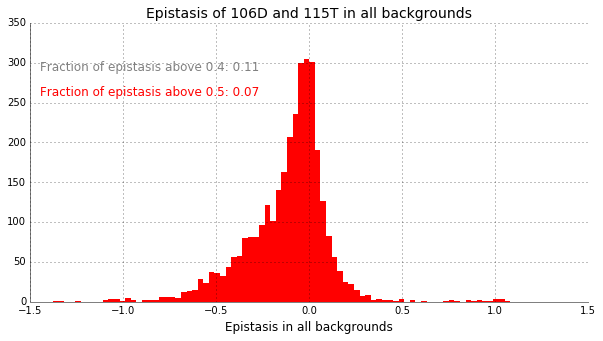

In [30]:
counter = 0
for mutation_pair in ep_dict:
    mutA, mutB = mutation_pair
    plot_better()
    title = 'Epistasis of %s and %s in all backgrounds' %(mutA, mutB)
    hist_array = plt.hist(ep_dict[mutation_pair], edgecolor='none', range=(-1.5,1.5), bins=100, color='red')
    plt.text(-1.45, 0.95*max(hist_array[0]), 
             'Fraction of epistasis above 0.4: %.2f' %get_fraction_strong(ep_dict[mutation_pair]), fontsize=12, color='gray')
    plt.text(-1.45, 0.85*max(hist_array[0]), 
             'Fraction of epistasis above 0.5: %.2f' %get_fraction_strong(ep_dict[mutation_pair], strong_epistasis_threshold=0.5), fontsize=12, color='red')

    plt.title(title, fontsize=14)
    plt.xlabel('Epistasis in all backgrounds', fontsize=12)
    counter += 1
    if counter == 20:
        break